In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import Rbf

from evaluation import eval, eval_multi, logger, MODE_ADVERSARY, MODE_RANDOM, MODE_ADV_TASK_DIVERSITY
%load_ext autoreload
%autoreload 2

In [2]:
T = 100 # Timesteps/horizon
n_task = 150
alpha_set = [1.0] # Bonus for UCB
v_set = [1.0] # Bonus for TS
alpha_PHE_set = [1.0] # Bonus for PHE
tau_1_PEGE_set = [T//2] # EXR length for PEGE
is_multi = True
input_dict = {
    "d":5, # n_dims
    "unit_ball_action": True,
    "n_gen_context":20, #if not unit ball action set, how many action sampled from the action set
    "T":T, # Timesteps/horizon
    "n_sim":5, # Number of Simulations
    "rho":0.5,
    "noise_std":0.3,
    "seed":None, #TODO: bug here, must set to None
    "output":True,
    "params_set":alpha_set,
    "m":1, # n_dims latent
    "n_task":n_task,
    "mode":MODE_ADV_TASK_DIVERSITY,
    "adv_exr_const":1, # scaling factor for adversary task generation
    "adv_exr_task":None, # specific tasks to reveal a new dimension
    "PMA_exr_const":1.5, # scaling factor for exploration probability
    "PMA_lr_const":1, # scaling factor for the learning rate
    "PMA_n_expert":100000, # Expert set size for PMA
    "PMA_tau1_const":1, # scaling factor for PEGE's EXR length in the EXR phase
    "PMA_tau2_const":1, # scaling factor for PEGE's EXR length in the EXT phase
    "PMA_alpha_const":1, # scaling factor for PMA's alpha threshold
    "p_decay_rate":0, # decay rate for EXR prob. May be useful for Task Diversity setting
    "PMA_stop_exr":n_task, # Stop EXR after PMA_stop_exr step
    "PMA_no_oracle":False,
    "SeqRepL_exr_const":1.5,
    "SeqRepL_tau1_const":1,
    "SeqRepL_tau2_const":1,
    "SeqRepL_stop_exr":n_task, # Stop EXR after PMA_stop_exr step
}
m = input_dict["m"]
d = input_dict["d"]
assert m<=d, "m >= d"
assert m<=d, "m >= d"
if T<d**2:
    logger.info(f"Warning: T < d**2")
if n_task < np.sqrt(T):
    logger.info(f"Warning: n_task < np.sqrt(T)")
if input_dict["adv_exr_task"] is not None:
    assert max(input_dict["adv_exr_task"]) < input_dict["n_task"], f"max exr task ({max(input_dict["adv_exr_task"])}) is larger than n_task ({input_dict["n_task"]})"
    assert len(input_dict["adv_exr_task"]) == input_dict["m"]-1, f"exr list (len={len(input_dict["adv_exr_task"])+1}) is incorrect (!= m ({input_dict["m"]}))"

# With Task Diversity

In [3]:
n_task = 2000
input_dict["mode"] = MODE_ADV_TASK_DIVERSITY
input_dict["adv_exr_const"] = 0.1 #0.09
input_dict["n_sim"] = 5
input_dict["m"] = 3
input_dict["d"] = 10
input_dict["T"] = 450
input_dict["noise_std"] = 1
input_dict["n_task"] = n_task
input_dict["PMA_n_expert"] = 10000
# input_dict["adv_exr_task"] = [500, 1500]

In [ ]:
input_dict["name"] = "PEGE"
# input_dict["params_set"] = [25] # tau_1
input_dict["params_set"] = [190, 210] # tau_1
best_PEGE = eval_multi(input_dict)

In [ ]:
input_dict["name"] = "PEGE_oracle"
# input_dict["params_set"] = [2] # tau_2
input_dict["params_set"] = [45, 55] # tau_2
best_PEGE_oracle = eval_multi(input_dict)

In [ ]:
input_dict["name"] = "PMA"
input_dict["params_set"] = [None] # Placeholder
input_dict["PMA_no_oracle"] = False
# input_dict["PMA_exr_const"] = 0.45 # (0.45) p=0.1 is good for n_task=500, d=10, m=3, T=500. 0.23 for n_task=300
# input_dict["PMA_tau1_const"] = 0.75 #Large enough to have a good estimate of theta. tau_1 = 150 is good for d=10
# input_dict["PMA_tau2_const"] = 0.5 #tau_2 = 20 is ok for m = 3
# input_dict["PMA_alpha_const"] = 0.3 #0.45 for n_task=500. Small enough to filter wrong experts. Not too small to exclude the true expert

# input_dict["PMA_exr_const"] = 0.65
# input_dict["PMA_tau1_const"] = 1.75
# input_dict["PMA_tau2_const"] = 0.8
# input_dict["PMA_alpha_const"] = 1.35
# # input_dict["PMA_n_expert"] = 20

input_dict["PMA_n_expert"] = 100000
input_dict["PMA_exr_const"] = 1.75
input_dict["PMA_tau1_const"] = 2.5
input_dict["PMA_alpha_const"] = 1.5 #1.5
input_dict["PMA_stop_exr"] = n_task
best_PMA = eval_multi(input_dict)

In [ ]:
input_dict["name"] = "PMA"
input_dict["PMA_no_oracle"] = True

input_dict["PMA_n_expert"] = 100000
input_dict["PMA_exr_const"] = 1.75
input_dict["PMA_tau1_const"] = 2.5
input_dict["PMA_alpha_const"] = 1.5 #1.5
input_dict["PMA_stop_exr"] = n_task
best_PMA_no_oracle = eval_multi(input_dict)

In [ ]:
# input_dict["name"] = "PMA"
# input_dict["PMA_p_decay_rate"] = 0.000 # 0.01
# input_dict["PMA_no_oracle"] = False
# # input_dict["PMA_n_expert"] = 20
# # input_dict["PMA_alpha_const"] = 0.5
# best_PMA_decay = eval_multi(input_dict)
input_dict["name"] = "PMA"
input_dict["PMA_stop_exr"] = n_task//2
input_dict["PMA_no_oracle"] = False
best_PMA_stop_exr = eval_multi(input_dict)

In [ ]:
input_dict["name"] = "SeqRepL"
# input_dict["SeqRepL_exr_const"] = 0.01 # 0.01
# input_dict["SeqRepL_tau1_const"] = 0.5 # 0.4
# input_dict["SeqRepL_tau2_const"] = 0.5 # 0.5

input_dict["SeqRepL_exr_const"] = 0.005 # 0.01
input_dict["SeqRepL_tau1_const"] = 0.4 # 0.4
input_dict["SeqRepL_tau2_const"] = 0.5 # 0.5
best_SeqRepL = eval_multi(input_dict)

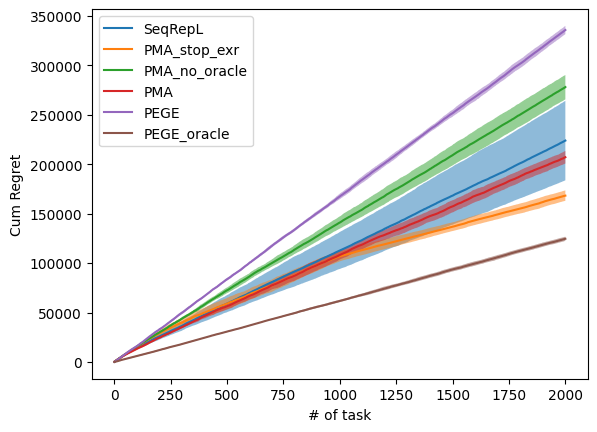

In [42]:
mean_PEGE = np.mean(best_PEGE['regrets'], axis=0)
std_PEGE = np.std(best_PEGE['regrets'], axis=0)
mean_PEGE_oracle = np.mean(best_PEGE_oracle['regrets'], axis=0)
std_PEGE_oracle = np.std(best_PEGE_oracle['regrets'], axis=0)
mean_PMA = np.mean(best_PMA['regrets'], axis=0)
std_PMA = np.std(best_PMA['regrets'], axis=0)
# mean_PMA_decay = np.mean(best_PMA_decay['regrets'], axis=0)
# std_PMA_decay = np.std(best_PMA_decay['regrets'], axis=0)
mean_PMA_stop_exr = np.mean(best_PMA_stop_exr['regrets'], axis=0)
std_PMA_stop_exr = np.std(best_PMA_stop_exr['regrets'], axis=0)
mean_PMA_no_oracle = np.mean(best_PMA_no_oracle['regrets'], axis=0)
std_PMA_no_oracle = np.std(best_PMA_no_oracle['regrets'], axis=0)
mean_SeqRepL = np.mean(best_SeqRepL['regrets'], axis=0)
std_SeqRepL = np.std(best_SeqRepL['regrets'], axis=0)
X = np.arange(1,n_task+1)
plt.plot(X, mean_SeqRepL, '-', label='SeqRepL')
plt.fill_between(X, mean_SeqRepL-std_SeqRepL, mean_SeqRepL+std_SeqRepL, alpha=0.5)
plt.plot(X, mean_PMA_stop_exr, '-', label='PMA_stop_exr')
plt.fill_between(X, mean_PMA_stop_exr-std_PMA_stop_exr, mean_PMA_stop_exr+std_PMA_stop_exr, alpha=0.5)
plt.plot(X, mean_PMA_no_oracle, '-', label='PMA_no_oracle')
plt.fill_between(X, mean_PMA_no_oracle-std_PMA_no_oracle, mean_PMA_no_oracle+std_PMA_no_oracle, alpha=0.5)
# plt.plot(X, mean_PMA_decay, '-', label='PMA_decay')
# plt.fill_between(X, mean_PMA_decay-std_PMA_decay, mean_PMA_decay+std_PMA_decay, alpha=0.5)
plt.plot(X, mean_PMA, '-', label='PMA')
plt.fill_between(X, mean_PMA-std_PMA, mean_PMA+std_PMA, alpha=0.5)
plt.plot(X, mean_PEGE, '-', label='PEGE')
plt.fill_between(X, mean_PEGE-std_PEGE, mean_PEGE+std_PEGE, alpha=0.5)
plt.plot(X, mean_PEGE_oracle, '-', label='PEGE_oracle')
plt.fill_between(X, mean_PEGE_oracle-std_PEGE_oracle, mean_PEGE_oracle+std_PEGE_oracle, alpha=0.5)
plt.xlabel('# of task')
plt.ylabel('Cum Regret')
plt.legend()
plt.show()
plt.close()

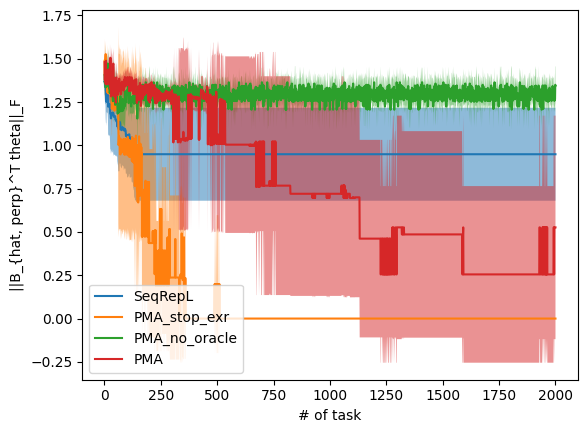

In [45]:
mean_PMA = np.mean(best_PMA['B_hat_err'], axis=0)
std_PMA = np.std(best_PMA['B_hat_err'], axis=0)
mean_SeqRepL = np.mean(best_SeqRepL['B_hat_err'], axis=0)
std_SeqRepL = np.std(best_SeqRepL['B_hat_err'], axis=0)
mean_PMA_stop_exr = np.mean(best_PMA_stop_exr['B_hat_err'], axis=0)
std_PMA_stop_exr = np.std(best_PMA_stop_exr['B_hat_err'], axis=0)
mean_PMA_no_oracle = np.mean(best_PMA_no_oracle['B_hat_err'], axis=0)
std_PMA_no_oracle = np.std(best_PMA_no_oracle['B_hat_err'], axis=0)
plt.plot(X, mean_SeqRepL, '-', label='SeqRepL')
plt.fill_between(X, mean_SeqRepL-std_SeqRepL, mean_SeqRepL+std_SeqRepL, alpha=0.5)
plt.plot(X, mean_PMA_stop_exr, '-', label='PMA_stop_exr')
plt.fill_between(X, mean_PMA_stop_exr-std_PMA_stop_exr, mean_PMA_stop_exr+std_PMA_stop_exr, alpha=0.5)
plt.plot(X, mean_PMA_no_oracle, '-', label='PMA_no_oracle')
plt.fill_between(X, mean_PMA_no_oracle-std_PMA_no_oracle, mean_PMA_no_oracle+std_PMA_no_oracle, alpha=0.5)
plt.plot(X, mean_PMA, '-', label='PMA')
plt.fill_between(X, mean_PMA-std_PMA, mean_PMA+std_PMA, alpha=0.5)
plt.xlabel('# of task')
plt.ylabel('||B_{hat, perp}^T theta||_F')
plt.legend()
plt.show()
plt.close()

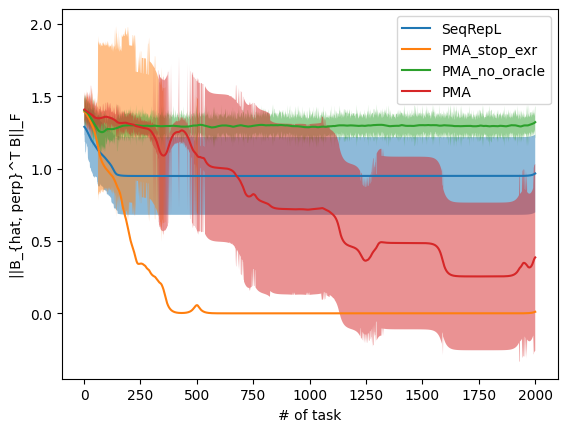

In [44]:
X = np.arange(1,n_task+1)
rbf = Rbf(X, mean_PMA_stop_exr, function = 'multiquadric', smooth = 500)
y_PMA_stop_exr_rbf = rbf(X)
rbf = Rbf(X, mean_PMA_no_oracle, function = 'multiquadric', smooth = 500)
y_PMA_no_oracle_rbf = rbf(X)
rbf = Rbf(X, mean_PMA, function = 'multiquadric', smooth = 500)
y_PMA_rbf = rbf(X)
rbf = Rbf(X, mean_SeqRepL, function = 'multiquadric', smooth = 500)
y_SeqRepL_rbf = rbf(X)

plt.plot(X, y_SeqRepL_rbf, '-', label='SeqRepL')
plt.fill_between(X, y_SeqRepL_rbf-std_SeqRepL, y_SeqRepL_rbf+std_SeqRepL, alpha=0.5)
plt.plot(X, y_PMA_stop_exr_rbf, '-', label='PMA_stop_exr')
plt.fill_between(X, y_PMA_rbf-std_PMA_stop_exr, y_PMA_rbf+std_PMA_stop_exr, alpha=0.5)
plt.plot(X, y_PMA_no_oracle_rbf, '-', label='PMA_no_oracle')
plt.fill_between(X, y_PMA_no_oracle_rbf-std_PMA_no_oracle, y_PMA_no_oracle_rbf+std_PMA_no_oracle, alpha=0.5)
plt.plot(X, y_PMA_rbf, '-', label='PMA')
plt.fill_between(X, y_PMA_rbf-std_PMA, y_PMA_rbf+std_PMA, alpha=0.5)
plt.xlabel('# of task')
plt.ylabel('||B_{hat, perp}^T B||_F')

plt.legend()
plt.show()

# Without Task Diversity

In [105]:
# n_task = 2000
input_dict["mode"] = MODE_ADVERSARY
# input_dict["adv_exr_const"] = 0.1 #0.09
input_dict["n_sim"] = 5
# input_dict["m"] = 3
# input_dict["d"] = 10
# input_dict["T"] = 450
# input_dict["noise_std"] = 1
# input_dict["n_task"] = n_task
# input_dict["PMA_n_expert"] = 10000
input_dict["PMA_stop_exr"] = n_task

In [ ]:
input_dict["name"] = "PEGE"
input_dict["params_set"] = [190, 210] # tau_1
best_PEGE2 = eval_multi(input_dict)

In [ ]:
input_dict["name"] = "PEGE_oracle"
input_dict["params_set"] = [45, 55] # tau_1
best_PEGE_oracle2 = eval_multi(input_dict)

In [ ]:
input_dict["name"] = "PMA"
input_dict["params_set"] = [None] # Placeholder
input_dict["PMA_exr_const"] = 0.8 # 1.75
input_dict["PMA_tau1_const"] = 2.5 #2.5
input_dict["PMA_tau2_const"] = 0.8 #
input_dict["PMA_alpha_const"] = 1.35 #1.35, 1.5
input_dict["PMA_no_oracle"] = False
input_dict["PMA_stop_exr"] = n_task
input_dict["n_sim"] = 5
best_PMA2 = eval_multi(input_dict)

In [166]:
input_dict["name"] = "PMA"
input_dict["PMA_no_oracle"] = True
# input_dict["PMA_n_expert"] = 100000
input_dict["PMA_exr_const"] = 1.0
# input_dict["PMA_tau1_const"] = 2.5
# input_dict["PMA_alpha_const"] = 1.5 #1.5

input_dict["PMA_stop_exr"] = n_task
best_PMA_no_oracle2 = eval_multi(input_dict)

PMA Simulation 1, N_gen_ctx=20, d=10
2024-05-24 23:29:18 Warning: PMA's expert dist is still uniform. Reduce PMA_alpha_const or increase PMA_tau1_const
2024-05-24 23:29:18 PMA's exp prob = 0.12, tau_1 = 412.74, tau_2 = 50.91


  0%|          | 0/2000 [00:00<?, ?it/s]

2024-05-24 23:29:18 ==== [Adv reveals] 1/3 dims with prob q = 0.0005983778907376325


  1%|          | 17/2000 [00:01<02:29, 13.22it/s]

2024-05-24 23:29:20 Warning: check_alpha_cover fails (covers all experts) l=0.0. Decrease PMA_alpha_const.


  2%|▏         | 32/2000 [00:02<02:22, 13.83it/s]

2024-05-24 23:29:21 Warning: check_alpha_cover fails (covers all experts) l=0.0. Decrease PMA_alpha_const.


  4%|▍         | 85/2000 [00:06<01:50, 17.27it/s]

2024-05-24 23:29:26 Warning: check_alpha_cover fails (covers all experts) l=0.0. Decrease PMA_alpha_const.


  4%|▍         | 90/2000 [00:07<02:11, 14.56it/s]

2024-05-24 23:29:26 Warning: check_alpha_cover fails (covers all experts) l=0.0. Decrease PMA_alpha_const.


 15%|█▍        | 291/2000 [00:17<02:11, 13.04it/s]

2024-05-24 23:29:36 Warning: check_alpha_cover fails (covers all experts) l=0.0. Decrease PMA_alpha_const.


 18%|█▊        | 363/2000 [00:21<01:16, 21.43it/s]

2024-05-24 23:29:40 Warning: check_alpha_cover fails (covers all experts) l=0.0. Decrease PMA_alpha_const.


 19%|█▉        | 375/2000 [00:23<02:40, 10.11it/s]

2024-05-24 23:29:42 Warning: check_alpha_cover fails (covers all experts) l=0.0. Decrease PMA_alpha_const.


 31%|███       | 616/2000 [00:38<02:14, 10.29it/s]

2024-05-24 23:29:57 Warning: check_alpha_cover fails (covers all experts) l=0.0. Decrease PMA_alpha_const.


 39%|███▉      | 784/2000 [00:51<01:38, 12.33it/s]

2024-05-24 23:30:10 Warning: check_alpha_cover fails (covers all experts) l=0.0. Decrease PMA_alpha_const.


 40%|████      | 810/2000 [00:53<01:26, 13.79it/s]

2024-05-24 23:30:12 Warning: check_alpha_cover fails (covers all experts) l=0.0. Decrease PMA_alpha_const.


 43%|████▎     | 855/2000 [00:55<00:44, 25.89it/s]

2024-05-24 23:30:14 Warning: check_alpha_cover fails (covers all experts) l=0.0. Decrease PMA_alpha_const.


 57%|█████▋    | 1149/2000 [01:11<00:51, 16.63it/s]

2024-05-24 23:30:30 Warning: check_alpha_cover fails (covers all experts) l=0.0. Decrease PMA_alpha_const.


 62%|██████▏   | 1246/2000 [01:15<00:38, 19.65it/s]

2024-05-24 23:30:34 Warning: check_alpha_cover fails (covers all experts) l=0.0. Decrease PMA_alpha_const.


 70%|███████   | 1404/2000 [01:20<00:10, 55.50it/s]

2024-05-24 23:30:40 Warning: check_alpha_cover fails (covers all experts) l=0.0. Decrease PMA_alpha_const.


 71%|███████▏  | 1427/2000 [01:22<00:27, 20.96it/s]

2024-05-24 23:30:42 Warning: check_alpha_cover fails (covers all experts) l=0.0. Decrease PMA_alpha_const.


 74%|███████▍  | 1475/2000 [01:25<00:31, 16.70it/s]

2024-05-24 23:30:44 Warning: check_alpha_cover fails (covers all experts) l=0.0. Decrease PMA_alpha_const.


 75%|███████▍  | 1492/2000 [01:26<00:33, 15.37it/s]

2024-05-24 23:30:46 Warning: check_alpha_cover fails (covers all experts) l=0.0. Decrease PMA_alpha_const.


 76%|███████▌  | 1517/2000 [01:28<00:30, 16.05it/s]

2024-05-24 23:30:48 Warning: check_alpha_cover fails (covers all experts) l=0.0. Decrease PMA_alpha_const.


 76%|███████▋  | 1528/2000 [01:30<00:38, 12.40it/s]

2024-05-24 23:30:49 Warning: check_alpha_cover fails (covers all experts) l=0.0. Decrease PMA_alpha_const.


 78%|███████▊  | 1566/2000 [01:32<00:24, 17.92it/s]

2024-05-24 23:30:51 ==== [Adv reveals] 2/3 dims with prob q = 0.0012673601769424144


 82%|████████▏ | 1644/2000 [01:38<00:42,  8.33it/s]

2024-05-24 23:30:57 Warning: check_alpha_cover fails (covers all experts) l=0.0. Decrease PMA_alpha_const.


 86%|████████▌ | 1710/2000 [01:42<00:16, 17.51it/s]

2024-05-24 23:31:01 Warning: check_alpha_cover fails (covers all experts) l=0.0. Decrease PMA_alpha_const.


 92%|█████████▏| 1830/2000 [01:49<00:10, 15.53it/s]

2024-05-24 23:31:09 Warning: check_alpha_cover fails (covers all experts) l=0.0. Decrease PMA_alpha_const.


 92%|█████████▏| 1842/2000 [01:51<00:22,  7.14it/s]

2024-05-24 23:31:11 Warning: check_alpha_cover fails (covers all experts) l=0.0. Decrease PMA_alpha_const.


 94%|█████████▍| 1877/2000 [01:53<00:09, 13.15it/s]

2024-05-24 23:31:13 Warning: check_alpha_cover fails (covers all experts) l=0.0. Decrease PMA_alpha_const.


 95%|█████████▌| 1904/2000 [01:55<00:04, 19.57it/s]

2024-05-24 23:31:15 Warning: check_alpha_cover fails (covers all experts) l=0.0. Decrease PMA_alpha_const.


 96%|█████████▌| 1916/2000 [01:57<00:06, 13.73it/s]

2024-05-24 23:31:16 Warning: check_alpha_cover fails (covers all experts) l=0.0. Decrease PMA_alpha_const.


 97%|█████████▋| 1931/2000 [01:58<00:04, 14.91it/s]

2024-05-24 23:31:17 ==== [Adv reveals] 3/3 dims with prob q = 0.003143864521157869


 97%|█████████▋| 1938/2000 [01:58<00:03, 20.43it/s]

2024-05-24 23:31:17 Warning: check_alpha_cover fails (covers all experts) l=0.0. Decrease PMA_alpha_const.


 98%|█████████▊| 1952/2000 [01:58<00:02, 23.08it/s]

2024-05-24 23:31:18 Warning: check_alpha_cover fails (covers all experts) l=0.0. Decrease PMA_alpha_const.


 99%|█████████▉| 1989/2000 [02:01<00:00, 13.65it/s]

2024-05-24 23:31:21 Warning: check_alpha_cover fails (covers all experts) l=0.0. Decrease PMA_alpha_const.


100%|██████████| 2000/2000 [02:02<00:00, 16.34it/s]

PMA Simulation 2, N_gen_ctx=20, d=10


2024-05-24 23:31:23 Warning: PMA's expert dist is still uniform. Reduce PMA_alpha_const or increase PMA_tau1_const
2024-05-24 23:31:23 PMA's exp prob = 0.12, tau_1 = 412.74, tau_2 = 50.91


  0%|          | 0/2000 [00:00<?, ?it/s]

2024-05-24 23:31:23 ==== [Adv reveals] 1/3 dims with prob q = 0.0005983778907376325
2024-05-24 23:31:24 Warning: check_alpha_cover fails (covers all experts) l=0.0. Decrease PMA_alpha_const.
2024-05-24 23:31:24 Warning: PMA's expert dist is still uniform. Reduce PMA_alpha_const or increase PMA_tau1_const


  0%|          | 1/2000 [00:00<16:07,  2.07it/s]

2024-05-24 23:31:24 Warning: PMA's expert dist is still uniform. Reduce PMA_alpha_const or increase PMA_tau1_const


  6%|▌         | 111/2000 [00:09<02:17, 13.70it/s]

2024-05-24 23:31:33 Warning: check_alpha_cover fails (covers all experts) l=0.0. Decrease PMA_alpha_const.


 11%|█         | 213/2000 [00:14<01:10, 25.47it/s]

2024-05-24 23:31:39 Warning: check_alpha_cover fails (covers all experts) l=0.0. Decrease PMA_alpha_const.


 18%|█▊        | 361/2000 [00:24<01:07, 24.44it/s]

2024-05-24 23:31:49 Warning: check_alpha_cover fails (covers all experts) l=0.0. Decrease PMA_alpha_const.


 24%|██▍       | 480/2000 [00:32<01:46, 14.27it/s]

2024-05-24 23:31:56 Warning: check_alpha_cover fails (covers all experts) l=0.0. Decrease PMA_alpha_const.


 24%|██▍       | 484/2000 [00:32<02:05, 12.03it/s]

2024-05-24 23:31:56 Warning: check_alpha_cover fails (covers all experts) l=0.0. Decrease PMA_alpha_const.


 24%|██▍       | 487/2000 [00:33<02:33,  9.84it/s]

2024-05-24 23:31:57 Warning: check_alpha_cover fails (covers all experts) l=0.0. Decrease PMA_alpha_const.


 26%|██▋       | 525/2000 [00:35<02:03, 11.91it/s]

2024-05-24 23:31:59 Warning: check_alpha_cover fails (covers all experts) l=0.0. Decrease PMA_alpha_const.


 27%|██▋       | 532/2000 [00:36<02:40,  9.17it/s]

2024-05-24 23:32:01 Warning: check_alpha_cover fails (covers all experts) l=0.0. Decrease PMA_alpha_const.


 28%|██▊       | 553/2000 [00:37<01:05, 22.08it/s]

2024-05-24 23:32:01 Warning: check_alpha_cover fails (covers all experts) l=0.0. Decrease PMA_alpha_const.


 33%|███▎      | 655/2000 [00:43<01:10, 18.95it/s]

2024-05-24 23:32:07 Warning: check_alpha_cover fails (covers all experts) l=0.0. Decrease PMA_alpha_const.


 34%|███▎      | 671/2000 [00:45<02:42,  8.18it/s]

2024-05-24 23:32:09 Warning: check_alpha_cover fails (covers all experts) l=0.0. Decrease PMA_alpha_const.


 34%|███▍      | 684/2000 [00:46<01:31, 14.31it/s]

2024-05-24 23:32:10 Warning: check_alpha_cover fails (covers all experts) l=0.0. Decrease PMA_alpha_const.


 38%|███▊      | 751/2000 [00:50<01:25, 14.56it/s]

2024-05-24 23:32:14 Warning: check_alpha_cover fails (covers all experts) l=0.0. Decrease PMA_alpha_const.


 38%|███▊      | 758/2000 [00:50<01:28, 14.01it/s]

2024-05-24 23:32:15 Warning: check_alpha_cover fails (covers all experts) l=0.0. Decrease PMA_alpha_const.


 41%|████      | 814/2000 [00:54<01:05, 18.12it/s]

2024-05-24 23:32:18 Warning: check_alpha_cover fails (covers all experts) l=0.0. Decrease PMA_alpha_const.


 41%|████      | 824/2000 [00:55<01:28, 13.23it/s]

2024-05-24 23:32:19 Warning: check_alpha_cover fails (covers all experts) l=0.0. Decrease PMA_alpha_const.


 51%|█████     | 1017/2000 [01:07<00:56, 17.27it/s]

2024-05-24 23:32:31 Warning: check_alpha_cover fails (covers all experts) l=0.0. Decrease PMA_alpha_const.


 54%|█████▍    | 1085/2000 [01:13<01:23, 10.95it/s]

2024-05-24 23:32:37 Warning: check_alpha_cover fails (covers all experts) l=0.0. Decrease PMA_alpha_const.


 57%|█████▋    | 1147/2000 [01:19<01:30,  9.44it/s]

2024-05-24 23:32:43 Warning: check_alpha_cover fails (covers all experts) l=0.0. Decrease PMA_alpha_const.


 57%|█████▊    | 1150/2000 [01:20<01:39,  8.54it/s]

2024-05-24 23:32:44 Warning: check_alpha_cover fails (covers all experts) l=0.0. Decrease PMA_alpha_const.


 60%|██████    | 1209/2000 [01:24<01:14, 10.68it/s]

2024-05-24 23:32:48 Warning: check_alpha_cover fails (covers all experts) l=0.0. Decrease PMA_alpha_const.


 61%|██████    | 1213/2000 [01:24<01:19,  9.88it/s]

2024-05-24 23:32:48 Warning: check_alpha_cover fails (covers all experts) l=0.0. Decrease PMA_alpha_const.


 61%|██████    | 1219/2000 [01:25<01:40,  7.76it/s]

2024-05-24 23:32:49 Warning: check_alpha_cover fails (covers all experts) l=0.0. Decrease PMA_alpha_const.


 63%|██████▎   | 1268/2000 [01:28<00:46, 15.59it/s]

2024-05-24 23:32:53 Warning: check_alpha_cover fails (covers all experts) l=0.0. Decrease PMA_alpha_const.


 67%|██████▋   | 1349/2000 [01:35<01:13,  8.84it/s]

2024-05-24 23:32:59 Warning: check_alpha_cover fails (covers all experts) l=0.0. Decrease PMA_alpha_const.


 70%|██████▉   | 1390/2000 [01:39<00:30, 19.79it/s]

2024-05-24 23:33:03 Warning: check_alpha_cover fails (covers all experts) l=0.0. Decrease PMA_alpha_const.


 71%|███████   | 1418/2000 [01:42<01:20,  7.24it/s]

2024-05-24 23:33:06 Warning: check_alpha_cover fails (covers all experts) l=0.0. Decrease PMA_alpha_const.


 80%|████████  | 1602/2000 [01:57<00:27, 14.42it/s]

2024-05-24 23:33:21 Warning: check_alpha_cover fails (covers all experts) l=0.0. Decrease PMA_alpha_const.


 81%|████████▏ | 1628/2000 [01:59<00:24, 15.34it/s]

2024-05-24 23:33:23 Warning: check_alpha_cover fails (covers all experts) l=0.0. Decrease PMA_alpha_const.


 82%|████████▏ | 1636/2000 [02:00<00:43,  8.35it/s]

2024-05-24 23:33:24 ==== [Adv reveals] 2/3 dims with prob q = 0.0013864566011942906


 84%|████████▎ | 1673/2000 [02:03<00:20, 16.24it/s]

2024-05-24 23:33:26 ==== [Adv reveals] 3/3 dims with prob q = 0.0014484523715194194


 89%|████████▉ | 1780/2000 [02:09<00:13, 16.59it/s]

2024-05-24 23:33:33 Warning: check_alpha_cover fails (covers all experts) l=0.0. Decrease PMA_alpha_const.


 90%|█████████ | 1810/2000 [02:12<00:16, 11.27it/s]

2024-05-24 23:33:37 Warning: check_alpha_cover fails (covers all experts) l=0.0. Decrease PMA_alpha_const.


 94%|█████████▎| 1870/2000 [02:17<00:11, 11.16it/s]

2024-05-24 23:33:41 Warning: check_alpha_cover fails (covers all experts) l=0.0. Decrease PMA_alpha_const.


 95%|█████████▍| 1895/2000 [02:18<00:06, 16.29it/s]

2024-05-24 23:33:42 Warning: check_alpha_cover fails (covers all experts) l=0.0. Decrease PMA_alpha_const.


 96%|█████████▋| 1928/2000 [02:20<00:04, 15.18it/s]

2024-05-24 23:33:44 Warning: check_alpha_cover fails (covers all experts) l=0.0. Decrease PMA_alpha_const.


 97%|█████████▋| 1940/2000 [02:22<00:06,  9.94it/s]

2024-05-24 23:33:46 Warning: check_alpha_cover fails (covers all experts) l=0.0. Decrease PMA_alpha_const.


 99%|█████████▊| 1971/2000 [02:23<00:01, 23.01it/s]

2024-05-24 23:33:47 Warning: check_alpha_cover fails (covers all experts) l=0.0. Decrease PMA_alpha_const.


100%|██████████| 2000/2000 [02:26<00:00, 13.70it/s]


PMA Simulation 3, N_gen_ctx=20, d=10
2024-05-24 23:33:52 Warning: PMA's expert dist is still uniform. Reduce PMA_alpha_const or increase PMA_tau1_const
2024-05-24 23:33:52 PMA's exp prob = 0.12, tau_1 = 412.74, tau_2 = 50.91


  0%|          | 0/2000 [00:00<?, ?it/s]

2024-05-24 23:33:52 ==== [Adv reveals] 1/3 dims with prob q = 0.0005983778907376325


  0%|          | 1/2000 [00:00<15:30,  2.15it/s]

2024-05-24 23:33:53 Warning: check_alpha_cover fails (covers all experts) l=0.0. Decrease PMA_alpha_const.


  0%|          | 4/2000 [00:01<11:40,  2.85it/s]

2024-05-24 23:33:53 Warning: check_alpha_cover fails (covers all experts) l=0.0. Decrease PMA_alpha_const.


  5%|▍         | 94/2000 [00:05<02:03, 15.39it/s]

2024-05-24 23:33:58 Warning: check_alpha_cover fails (covers all experts) l=0.0. Decrease PMA_alpha_const.


 18%|█▊        | 360/2000 [00:18<01:11, 23.00it/s]

2024-05-24 23:34:11 Warning: check_alpha_cover fails (covers all experts) l=0.0. Decrease PMA_alpha_const.


 19%|█▉        | 376/2000 [00:19<01:03, 25.72it/s]

2024-05-24 23:34:12 Warning: check_alpha_cover fails (covers all experts) l=0.0. Decrease PMA_alpha_const.


 20%|██        | 400/2000 [00:21<02:04, 12.86it/s]

2024-05-24 23:34:14 Warning: check_alpha_cover fails (covers all experts) l=0.0. Decrease PMA_alpha_const.


 21%|██        | 413/2000 [00:23<02:42,  9.77it/s]

2024-05-24 23:34:15 Warning: check_alpha_cover fails (covers all experts) l=0.0. Decrease PMA_alpha_const.


 24%|██▍       | 484/2000 [00:28<00:42, 35.36it/s]

2024-05-24 23:34:20 Warning: check_alpha_cover fails (covers all experts) l=0.0. Decrease PMA_alpha_const.


 32%|███▏      | 635/2000 [00:35<01:28, 15.51it/s]

2024-05-24 23:34:28 Warning: check_alpha_cover fails (covers all experts) l=0.0. Decrease PMA_alpha_const.


 38%|███▊      | 754/2000 [00:44<01:05, 19.01it/s]

2024-05-24 23:34:36 Warning: check_alpha_cover fails (covers all experts) l=0.0. Decrease PMA_alpha_const.


 40%|████      | 806/2000 [00:47<00:49, 23.89it/s]

2024-05-24 23:34:40 Warning: check_alpha_cover fails (covers all experts) l=0.0. Decrease PMA_alpha_const.


 46%|████▌     | 910/2000 [00:55<00:38, 28.54it/s]

2024-05-24 23:34:47 ==== [Adv reveals] 2/3 dims with prob q = 0.0008080784753082214


 47%|████▋     | 942/2000 [00:57<01:16, 13.77it/s]

2024-05-24 23:34:50 Warning: check_alpha_cover fails (covers all experts) l=0.0. Decrease PMA_alpha_const.


 53%|█████▎    | 1065/2000 [01:04<01:43,  9.05it/s]

2024-05-24 23:34:57 Warning: check_alpha_cover fails (covers all experts) l=0.0. Decrease PMA_alpha_const.


 55%|█████▍    | 1091/2000 [01:06<01:03, 14.22it/s]

2024-05-24 23:34:58 Warning: check_alpha_cover fails (covers all experts) l=0.0. Decrease PMA_alpha_const.


 65%|██████▍   | 1292/2000 [01:17<01:03, 11.18it/s]

2024-05-24 23:35:10 Warning: check_alpha_cover fails (covers all experts) l=0.0. Decrease PMA_alpha_const.


 66%|██████▌   | 1321/2000 [01:19<00:44, 15.26it/s]

2024-05-24 23:35:12 Warning: check_alpha_cover fails (covers all experts) l=0.0. Decrease PMA_alpha_const.


 66%|██████▋   | 1330/2000 [01:20<00:55, 11.97it/s]

2024-05-24 23:35:13 Warning: check_alpha_cover fails (covers all experts) l=0.0. Decrease PMA_alpha_const.


 69%|██████▉   | 1380/2000 [01:25<00:52, 11.71it/s]

2024-05-24 23:35:17 Warning: check_alpha_cover fails (covers all experts) l=0.0. Decrease PMA_alpha_const.


 69%|██████▉   | 1386/2000 [01:25<00:52, 11.79it/s]

2024-05-24 23:35:18 Warning: check_alpha_cover fails (covers all experts) l=0.0. Decrease PMA_alpha_const.


 70%|███████   | 1408/2000 [01:26<00:26, 22.01it/s]

2024-05-24 23:35:19 Warning: check_alpha_cover fails (covers all experts) l=0.0. Decrease PMA_alpha_const.


 76%|███████▌  | 1511/2000 [01:31<00:25, 19.40it/s]

2024-05-24 23:35:24 Warning: check_alpha_cover fails (covers all experts) l=0.0. Decrease PMA_alpha_const.


 76%|███████▌  | 1516/2000 [01:32<00:30, 15.76it/s]

2024-05-24 23:35:24 Warning: check_alpha_cover fails (covers all experts) l=0.0. Decrease PMA_alpha_const.


 76%|███████▋  | 1526/2000 [01:33<00:38, 12.28it/s]

2024-05-24 23:35:25 Warning: check_alpha_cover fails (covers all experts) l=0.0. Decrease PMA_alpha_const.


 77%|███████▋  | 1542/2000 [01:34<00:33, 13.86it/s]

2024-05-24 23:35:26 Warning: check_alpha_cover fails (covers all experts) l=0.0. Decrease PMA_alpha_const.


 82%|████████▏ | 1641/2000 [01:41<00:14, 24.35it/s]

2024-05-24 23:35:34 Warning: check_alpha_cover fails (covers all experts) l=0.0. Decrease PMA_alpha_const.


 88%|████████▊ | 1767/2000 [01:50<00:15, 14.81it/s]

2024-05-24 23:35:42 Warning: check_alpha_cover fails (covers all experts) l=0.0. Decrease PMA_alpha_const.


 90%|█████████ | 1807/2000 [01:51<00:08, 22.78it/s]

2024-05-24 23:35:44 Warning: check_alpha_cover fails (covers all experts) l=0.0. Decrease PMA_alpha_const.


 91%|█████████▏| 1826/2000 [01:53<00:09, 18.34it/s]

2024-05-24 23:35:45 Warning: check_alpha_cover fails (covers all experts) l=0.0. Decrease PMA_alpha_const.


 97%|█████████▋| 1934/2000 [02:02<00:04, 13.20it/s]

2024-05-24 23:35:54 Warning: check_alpha_cover fails (covers all experts) l=0.0. Decrease PMA_alpha_const.


 98%|█████████▊| 1968/2000 [02:05<00:02, 13.15it/s]

2024-05-24 23:35:58 Warning: check_alpha_cover fails (covers all experts) l=0.0. Decrease PMA_alpha_const.


 99%|█████████▊| 1974/2000 [02:05<00:02, 12.75it/s]

2024-05-24 23:35:58 Warning: check_alpha_cover fails (covers all experts) l=0.0. Decrease PMA_alpha_const.


100%|██████████| 2000/2000 [02:08<00:00, 15.61it/s]


PMA Simulation 4, N_gen_ctx=20, d=10
2024-05-24 23:36:02 Warning: PMA's expert dist is still uniform. Reduce PMA_alpha_const or increase PMA_tau1_const
2024-05-24 23:36:02 PMA's exp prob = 0.12, tau_1 = 412.74, tau_2 = 50.91


  0%|          | 0/2000 [00:00<?, ?it/s]

2024-05-24 23:36:02 ==== [Adv reveals] 1/3 dims with prob q = 0.0005983778907376325


  6%|▋         | 127/2000 [00:10<03:41,  8.47it/s]

2024-05-24 23:36:13 Warning: check_alpha_cover fails (covers all experts) l=0.0. Decrease PMA_alpha_const.


  9%|▉         | 178/2000 [00:13<01:26, 21.10it/s]

2024-05-24 23:36:16 Warning: check_alpha_cover fails (covers all experts) l=0.0. Decrease PMA_alpha_const.


 11%|█         | 219/2000 [00:16<02:13, 13.36it/s]

2024-05-24 23:36:20 Warning: check_alpha_cover fails (covers all experts) l=0.0. Decrease PMA_alpha_const.


 13%|█▎        | 260/2000 [00:19<01:24, 20.56it/s]

2024-05-24 23:36:22 Warning: check_alpha_cover fails (covers all experts) l=0.0. Decrease PMA_alpha_const.


 15%|█▍        | 293/2000 [00:22<02:26, 11.67it/s]

2024-05-24 23:36:25 Warning: check_alpha_cover fails (covers all experts) l=0.0. Decrease PMA_alpha_const.


 15%|█▌        | 300/2000 [00:23<03:06,  9.13it/s]

2024-05-24 23:36:26 Warning: check_alpha_cover fails (covers all experts) l=0.0. Decrease PMA_alpha_const.


 16%|█▋        | 325/2000 [00:25<02:37, 10.66it/s]

2024-05-24 23:36:28 Warning: check_alpha_cover fails (covers all experts) l=0.0. Decrease PMA_alpha_const.


 23%|██▎       | 464/2000 [00:32<00:43, 35.31it/s]

2024-05-24 23:36:35 Warning: check_alpha_cover fails (covers all experts) l=0.0. Decrease PMA_alpha_const.


 24%|██▎       | 471/2000 [00:33<01:02, 24.29it/s]

2024-05-24 23:36:36 ==== [Adv reveals] 2/3 dims with prob q = 0.0006837670981205031


 27%|██▋       | 534/2000 [00:39<01:56, 12.55it/s]

2024-05-24 23:36:42 Warning: check_alpha_cover fails (covers all experts) l=0.0. Decrease PMA_alpha_const.


 30%|██▉       | 595/2000 [00:43<01:00, 23.11it/s]

2024-05-24 23:36:46 Warning: check_alpha_cover fails (covers all experts) l=0.0. Decrease PMA_alpha_const.


 32%|███▏      | 646/2000 [00:48<01:43, 13.10it/s]

2024-05-24 23:36:51 Warning: check_alpha_cover fails (covers all experts) l=0.0. Decrease PMA_alpha_const.


 40%|███▉      | 797/2000 [00:57<01:00, 20.02it/s]

2024-05-24 23:37:00 Warning: check_alpha_cover fails (covers all experts) l=0.0. Decrease PMA_alpha_const.


 44%|████▍     | 887/2000 [01:02<00:34, 32.27it/s]

2024-05-24 23:37:05 Warning: check_alpha_cover fails (covers all experts) l=0.0. Decrease PMA_alpha_const.


 47%|████▋     | 948/2000 [01:06<01:12, 14.55it/s]

2024-05-24 23:37:09 Warning: check_alpha_cover fails (covers all experts) l=0.0. Decrease PMA_alpha_const.


 48%|████▊     | 969/2000 [01:08<01:11, 14.42it/s]

2024-05-24 23:37:10 ==== [Adv reveals] 3/3 dims with prob q = 0.0008289335271521132


 52%|█████▏    | 1033/2000 [01:10<00:23, 40.60it/s]

2024-05-24 23:37:13 Warning: check_alpha_cover fails (covers all experts) l=0.0. Decrease PMA_alpha_const.


 57%|█████▋    | 1146/2000 [01:17<00:27, 30.60it/s]

2024-05-24 23:37:20 Warning: check_alpha_cover fails (covers all experts) l=0.0. Decrease PMA_alpha_const.


 59%|█████▉    | 1177/2000 [01:19<00:34, 23.69it/s]

2024-05-24 23:37:22 Warning: check_alpha_cover fails (covers all experts) l=0.0. Decrease PMA_alpha_const.


 59%|█████▉    | 1182/2000 [01:20<00:59, 13.69it/s]

2024-05-24 23:37:23 Warning: check_alpha_cover fails (covers all experts) l=0.0. Decrease PMA_alpha_const.


 62%|██████▏   | 1241/2000 [01:25<01:00, 12.47it/s]

2024-05-24 23:37:28 Warning: check_alpha_cover fails (covers all experts) l=0.0. Decrease PMA_alpha_const.


 70%|██████▉   | 1398/2000 [01:34<00:18, 33.11it/s]

2024-05-24 23:37:38 Warning: check_alpha_cover fails (covers all experts) l=0.0. Decrease PMA_alpha_const.


 72%|███████▏  | 1446/2000 [01:39<01:06,  8.30it/s]

2024-05-24 23:37:42 Warning: check_alpha_cover fails (covers all experts) l=0.0. Decrease PMA_alpha_const.


 81%|████████▏ | 1628/2000 [01:50<00:24, 15.06it/s]

2024-05-24 23:37:53 Warning: check_alpha_cover fails (covers all experts) l=0.0. Decrease PMA_alpha_const.


 83%|████████▎ | 1659/2000 [01:52<00:17, 19.21it/s]

2024-05-24 23:37:55 Warning: check_alpha_cover fails (covers all experts) l=0.0. Decrease PMA_alpha_const.


 86%|████████▌ | 1724/2000 [01:56<00:13, 19.90it/s]

2024-05-24 23:37:59 Warning: check_alpha_cover fails (covers all experts) l=0.0. Decrease PMA_alpha_const.


 88%|████████▊ | 1753/2000 [01:59<00:28,  8.58it/s]

2024-05-24 23:38:02 Warning: check_alpha_cover fails (covers all experts) l=0.0. Decrease PMA_alpha_const.


 89%|████████▉ | 1779/2000 [02:01<00:10, 21.21it/s]

2024-05-24 23:38:04 Warning: check_alpha_cover fails (covers all experts) l=0.0. Decrease PMA_alpha_const.


 93%|█████████▎| 1853/2000 [02:04<00:06, 23.42it/s]

2024-05-24 23:38:07 Warning: check_alpha_cover fails (covers all experts) l=0.0. Decrease PMA_alpha_const.


 96%|█████████▌| 1914/2000 [02:08<00:05, 15.26it/s]

2024-05-24 23:38:11 Warning: check_alpha_cover fails (covers all experts) l=0.0. Decrease PMA_alpha_const.


 99%|█████████▉| 1983/2000 [02:12<00:00, 17.26it/s]

2024-05-24 23:38:15 Warning: check_alpha_cover fails (covers all experts) l=0.0. Decrease PMA_alpha_const.


100%|██████████| 2000/2000 [02:14<00:00, 14.92it/s]


PMA Simulation 5, N_gen_ctx=20, d=10
2024-05-24 23:38:18 Warning: PMA's expert dist is still uniform. Reduce PMA_alpha_const or increase PMA_tau1_const
2024-05-24 23:38:18 PMA's exp prob = 0.12, tau_1 = 412.74, tau_2 = 50.91


  0%|          | 0/2000 [00:00<?, ?it/s]

2024-05-24 23:38:18 ==== [Adv reveals] 1/3 dims with prob q = 0.0005983778907376325


  1%|          | 13/2000 [00:01<01:55, 17.20it/s]

2024-05-24 23:38:20 Warning: check_alpha_cover fails (covers all experts) l=0.0. Decrease PMA_alpha_const.


  2%|▏         | 43/2000 [00:02<01:05, 29.94it/s]

2024-05-24 23:38:21 ==== [Adv reveals] 2/3 dims with prob q = 0.0006052734931233712


  5%|▍         | 93/2000 [00:04<01:22, 23.07it/s]

2024-05-24 23:38:24 Warning: check_alpha_cover fails (covers all experts) l=0.0. Decrease PMA_alpha_const.


  7%|▋         | 146/2000 [00:08<01:39, 18.60it/s]

2024-05-24 23:38:27 Warning: check_alpha_cover fails (covers all experts) l=0.0. Decrease PMA_alpha_const.


  8%|▊         | 163/2000 [00:09<02:19, 13.21it/s]

2024-05-24 23:38:29 Warning: check_alpha_cover fails (covers all experts) l=0.0. Decrease PMA_alpha_const.


  9%|▉         | 186/2000 [00:13<03:52,  7.80it/s]

2024-05-24 23:38:32 Warning: check_alpha_cover fails (covers all experts) l=0.0. Decrease PMA_alpha_const.


  9%|▉         | 187/2000 [00:13<04:47,  6.30it/s]

2024-05-24 23:38:32 Warning: check_alpha_cover fails (covers all experts) l=0.0. Decrease PMA_alpha_const.


 10%|█         | 207/2000 [00:15<02:41, 11.10it/s]

2024-05-24 23:38:34 Warning: check_alpha_cover fails (covers all experts) l=0.0. Decrease PMA_alpha_const.


 11%|█▏        | 229/2000 [00:15<01:10, 25.01it/s]

2024-05-24 23:38:35 Warning: check_alpha_cover fails (covers all experts) l=0.0. Decrease PMA_alpha_const.


 12%|█▏        | 247/2000 [00:16<01:01, 28.51it/s]

2024-05-24 23:38:35 Warning: check_alpha_cover fails (covers all experts) l=0.0. Decrease PMA_alpha_const.


 18%|█▊        | 368/2000 [00:21<00:43, 37.18it/s]

2024-05-24 23:38:41 Warning: check_alpha_cover fails (covers all experts) l=0.0. Decrease PMA_alpha_const.


 25%|██▍       | 499/2000 [00:31<01:49, 13.66it/s]

2024-05-24 23:38:51 Warning: check_alpha_cover fails (covers all experts) l=0.0. Decrease PMA_alpha_const.


 37%|███▋      | 736/2000 [00:46<01:35, 13.26it/s]

2024-05-24 23:39:06 Warning: check_alpha_cover fails (covers all experts) l=0.0. Decrease PMA_alpha_const.


 39%|███▉      | 775/2000 [00:48<00:44, 27.41it/s]

2024-05-24 23:39:07 Warning: check_alpha_cover fails (covers all experts) l=0.0. Decrease PMA_alpha_const.


 43%|████▎     | 853/2000 [00:53<01:12, 15.80it/s]

2024-05-24 23:39:12 Warning: check_alpha_cover fails (covers all experts) l=0.0. Decrease PMA_alpha_const.


 52%|█████▏    | 1039/2000 [01:03<00:44, 21.62it/s]

2024-05-24 23:39:23 Warning: check_alpha_cover fails (covers all experts) l=0.0. Decrease PMA_alpha_const.


 74%|███████▍  | 1480/2000 [01:28<00:24, 21.58it/s]

2024-05-24 23:39:47 Warning: check_alpha_cover fails (covers all experts) l=0.0. Decrease PMA_alpha_const.


 74%|███████▍  | 1486/2000 [01:28<00:29, 17.54it/s]

2024-05-24 23:39:48 Warning: check_alpha_cover fails (covers all experts) l=0.0. Decrease PMA_alpha_const.


 75%|███████▌  | 1508/2000 [01:30<00:21, 23.25it/s]

2024-05-24 23:39:49 Warning: check_alpha_cover fails (covers all experts) l=0.0. Decrease PMA_alpha_const.


 81%|████████  | 1617/2000 [01:35<00:24, 15.52it/s]

2024-05-24 23:39:54 Warning: check_alpha_cover fails (covers all experts) l=0.0. Decrease PMA_alpha_const.


 84%|████████▎ | 1671/2000 [01:39<00:16, 19.80it/s]

2024-05-24 23:39:58 ==== [Adv reveals] 3/3 dims with prob q = 0.0014463193254100096


 92%|█████████▏| 1831/2000 [01:49<00:08, 19.40it/s]

2024-05-24 23:40:08 Warning: check_alpha_cover fails (covers all experts) l=0.0. Decrease PMA_alpha_const.


 93%|█████████▎| 1860/2000 [01:50<00:05, 25.56it/s]

2024-05-24 23:40:09 Warning: check_alpha_cover fails (covers all experts) l=0.0. Decrease PMA_alpha_const.


 94%|█████████▍| 1878/2000 [01:52<00:10, 12.08it/s]

2024-05-24 23:40:11 Warning: check_alpha_cover fails (covers all experts) l=0.0. Decrease PMA_alpha_const.


 94%|█████████▍| 1882/2000 [01:52<00:10, 11.04it/s]

2024-05-24 23:40:12 Warning: check_alpha_cover fails (covers all experts) l=0.0. Decrease PMA_alpha_const.


 95%|█████████▌| 1900/2000 [01:54<00:09, 10.84it/s]

2024-05-24 23:40:13 Warning: check_alpha_cover fails (covers all experts) l=0.0. Decrease PMA_alpha_const.


100%|█████████▉| 1994/2000 [02:00<00:00, 13.68it/s]

2024-05-24 23:40:19 Warning: check_alpha_cover fails (covers all experts) l=0.0. Decrease PMA_alpha_const.


100%|██████████| 2000/2000 [02:00<00:00, 16.56it/s]

2024-05-24 23:40:19 idx of params chosen: 0


In [158]:
input_dict["name"] = "PMA"
input_dict["PMA_stop_exr"] = n_task//2
input_dict["PMA_no_oracle"] = False
best_PMA_stop_exr2 = eval_multi(input_dict)

PMA Simulation 1, N_gen_ctx=20, d=10
2024-05-24 23:12:36 Warning: PMA's expert dist is still uniform. Reduce PMA_alpha_const or increase PMA_tau1_const
2024-05-24 23:12:36 PMA's exp prob = 0.09, tau_1 = 412.74, tau_2 = 50.91


  0%|          | 0/2000 [00:00<?, ?it/s]

2024-05-24 23:12:36 ==== [Adv reveals] 1/3 dims with prob q = 0.0005983778907376325


  5%|▍         | 92/2000 [00:05<01:35, 20.04it/s]

2024-05-24 23:12:42 Warning: check_alpha_cover fails (covers all experts) l=0.0. Decrease PMA_alpha_const.


 11%|█         | 216/2000 [00:12<00:57, 30.84it/s]

2024-05-24 23:12:50 Warning: check_alpha_cover fails (covers all experts) l=0.0. Decrease PMA_alpha_const.
2024-05-24 23:12:50 Warning: check_alpha_cover fails (covers all experts) l=0.0. Decrease PMA_alpha_const.


 14%|█▍        | 287/2000 [00:18<01:13, 23.15it/s]

2024-05-24 23:12:55 Warning: check_alpha_cover fails (covers all experts) l=0.0. Decrease PMA_alpha_const.


 23%|██▎       | 463/2000 [00:30<00:34, 44.17it/s]

2024-05-24 23:13:06 ==== [Adv reveals] 2/3 dims with prob q = 0.0006824488912406028


 25%|██▌       | 503/2000 [00:31<01:08, 21.94it/s]

2024-05-24 23:13:09 Warning: check_alpha_cover fails (covers all experts) l=0.0. Decrease PMA_alpha_const.


 28%|██▊       | 556/2000 [00:34<01:06, 21.69it/s]

2024-05-24 23:13:11 Warning: check_alpha_cover fails (covers all experts) l=0.0. Decrease PMA_alpha_const.


 32%|███▏      | 633/2000 [00:40<01:27, 15.70it/s]

2024-05-24 23:13:17 Warning: check_alpha_cover fails (covers all experts) l=0.0. Decrease PMA_alpha_const.


 36%|███▌      | 714/2000 [00:46<01:23, 15.32it/s]

2024-05-24 23:13:24 Warning: check_alpha_cover fails (covers all experts) l=0.0. Decrease PMA_alpha_const.


 40%|███▉      | 791/2000 [00:52<01:41, 11.92it/s]

2024-05-24 23:13:29 Warning: check_alpha_cover fails (covers all experts) l=0.0. Decrease PMA_alpha_const.


 47%|████▋     | 948/2000 [01:00<00:49, 21.33it/s]

2024-05-24 23:13:37 Warning: check_alpha_cover fails (covers all experts) l=0.0. Decrease PMA_alpha_const.


 48%|████▊     | 955/2000 [01:01<00:56, 18.43it/s]

2024-05-24 23:13:38 Warning: check_alpha_cover fails (covers all experts) l=0.0. Decrease PMA_alpha_const.


 49%|████▉     | 980/2000 [01:02<00:45, 22.31it/s]

2024-05-24 23:13:39 Warning: check_alpha_cover fails (covers all experts) l=0.0. Decrease PMA_alpha_const.


 62%|██████▏   | 1230/2000 [01:05<00:09, 80.45it/s]

2024-05-24 23:13:42 ==== [Adv reveals] 3/3 dims with prob q = 0.0009568629600403547


100%|██████████| 2000/2000 [01:15<00:00, 26.66it/s]


PMA Simulation 2, N_gen_ctx=20, d=10
2024-05-24 23:13:53 Warning: PMA's expert dist is still uniform. Reduce PMA_alpha_const or increase PMA_tau1_const
2024-05-24 23:13:53 PMA's exp prob = 0.09, tau_1 = 412.74, tau_2 = 50.91


  0%|          | 0/2000 [00:00<?, ?it/s]

2024-05-24 23:13:53 ==== [Adv reveals] 1/3 dims with prob q = 0.0005983778907376325


 13%|█▎        | 253/2000 [00:16<01:00, 28.75it/s]

2024-05-24 23:14:10 Warning: check_alpha_cover fails (covers all experts) l=0.0. Decrease PMA_alpha_const.


 24%|██▍       | 486/2000 [00:29<01:11, 21.20it/s]

2024-05-24 23:14:24 Warning: check_alpha_cover fails (covers all experts) l=0.0. Decrease PMA_alpha_const.


 26%|██▋       | 526/2000 [00:30<00:31, 47.53it/s]

2024-05-24 23:14:25 Warning: check_alpha_cover fails (covers all experts) l=0.0. Decrease PMA_alpha_const.


 32%|███▏      | 649/2000 [00:37<00:41, 32.53it/s]

2024-05-24 23:14:31 Warning: check_alpha_cover fails (covers all experts) l=0.0. Decrease PMA_alpha_const.


 38%|███▊      | 767/2000 [00:41<00:45, 27.16it/s]

2024-05-24 23:14:36 Warning: check_alpha_cover fails (covers all experts) l=0.0. Decrease PMA_alpha_const.


 74%|███████▍  | 1488/2000 [00:58<00:06, 82.68it/s]

2024-05-24 23:14:52 ==== [Adv reveals] 2/3 dims with prob q = 0.0011713311535648259


 78%|███████▊  | 1569/2000 [00:59<00:05, 83.59it/s]

2024-05-24 23:14:53 ==== [Adv reveals] 3/3 dims with prob q = 0.0012673601769424144


100%|██████████| 2000/2000 [01:04<00:00, 30.78it/s]


PMA Simulation 3, N_gen_ctx=20, d=10
2024-05-24 23:15:01 Warning: PMA's expert dist is still uniform. Reduce PMA_alpha_const or increase PMA_tau1_const
2024-05-24 23:15:01 PMA's exp prob = 0.09, tau_1 = 412.74, tau_2 = 50.91


  0%|          | 0/2000 [00:00<?, ?it/s]

2024-05-24 23:15:01 ==== [Adv reveals] 1/3 dims with prob q = 0.0005983778907376325


  3%|▎         | 57/2000 [00:03<01:43, 18.84it/s]

2024-05-24 23:15:05 Warning: check_alpha_cover fails (covers all experts) l=0.0. Decrease PMA_alpha_const.


  5%|▌         | 103/2000 [00:07<01:58, 16.07it/s]

2024-05-24 23:15:09 Warning: check_alpha_cover fails (covers all experts) l=0.0. Decrease PMA_alpha_const.


  7%|▋         | 134/2000 [00:09<01:23, 22.45it/s]

2024-05-24 23:15:10 Warning: check_alpha_cover fails (covers all experts) l=0.0. Decrease PMA_alpha_const.


 13%|█▎        | 266/2000 [00:16<00:55, 31.43it/s]

2024-05-24 23:15:18 Warning: check_alpha_cover fails (covers all experts) l=0.0. Decrease PMA_alpha_const.


 14%|█▎        | 272/2000 [00:17<01:49, 15.78it/s]

2024-05-24 23:15:19 Warning: check_alpha_cover fails (covers all experts) l=0.0. Decrease PMA_alpha_const.


 23%|██▎       | 452/2000 [00:28<01:20, 19.16it/s]

2024-05-24 23:15:29 Warning: check_alpha_cover fails (covers all experts) l=0.0. Decrease PMA_alpha_const.


 37%|███▋      | 733/2000 [00:41<01:01, 20.74it/s]

2024-05-24 23:15:43 Warning: check_alpha_cover fails (covers all experts) l=0.0. Decrease PMA_alpha_const.


 42%|████▎     | 850/2000 [00:48<01:26, 13.31it/s]

2024-05-24 23:15:50 Warning: check_alpha_cover fails (covers all experts) l=0.0. Decrease PMA_alpha_const.


 48%|████▊     | 964/2000 [00:53<00:47, 21.79it/s]

2024-05-24 23:15:55 Warning: check_alpha_cover fails (covers all experts) l=0.0. Decrease PMA_alpha_const.


 85%|████████▍ | 1698/2000 [01:04<00:03, 82.96it/s]

2024-05-24 23:16:05 ==== [Adv reveals] 2/3 dims with prob q = 0.0015075038585965026


 97%|█████████▋| 1932/2000 [01:07<00:00, 83.59it/s]

2024-05-24 23:16:08 ==== [Adv reveals] 3/3 dims with prob q = 0.0032150080137009276


100%|██████████| 2000/2000 [01:07<00:00, 29.42it/s]


PMA Simulation 4, N_gen_ctx=20, d=10
2024-05-24 23:16:11 Warning: PMA's expert dist is still uniform. Reduce PMA_alpha_const or increase PMA_tau1_const
2024-05-24 23:16:11 PMA's exp prob = 0.09, tau_1 = 412.74, tau_2 = 50.91


  0%|          | 0/2000 [00:00<?, ?it/s]

2024-05-24 23:16:11 ==== [Adv reveals] 1/3 dims with prob q = 0.0005983778907376325


  6%|▋         | 130/2000 [00:10<04:19,  7.20it/s]

2024-05-24 23:16:21 ==== [Adv reveals] 2/3 dims with prob q = 0.0006191614191987232


 10%|▉         | 193/2000 [00:12<01:48, 16.63it/s]

2024-05-24 23:16:24 Warning: check_alpha_cover fails (covers all experts) l=0.0. Decrease PMA_alpha_const.


 11%|█         | 215/2000 [00:13<01:03, 28.19it/s]

2024-05-24 23:16:25 Warning: check_alpha_cover fails (covers all experts) l=0.0. Decrease PMA_alpha_const.


 31%|███       | 621/2000 [00:33<00:58, 23.69it/s]

2024-05-24 23:16:45 Warning: check_alpha_cover fails (covers all experts) l=0.0. Decrease PMA_alpha_const.


 33%|███▎      | 655/2000 [00:36<01:35, 14.05it/s]

2024-05-24 23:16:48 Warning: check_alpha_cover fails (covers all experts) l=0.0. Decrease PMA_alpha_const.


 44%|████▍     | 879/2000 [00:46<01:06, 16.83it/s]

2024-05-24 23:16:58 ==== [Adv reveals] 3/3 dims with prob q = 0.0007956042543196643


100%|██████████| 2000/2000 [01:05<00:00, 30.51it/s]


PMA Simulation 5, N_gen_ctx=20, d=10
2024-05-24 23:17:19 Warning: PMA's expert dist is still uniform. Reduce PMA_alpha_const or increase PMA_tau1_const
2024-05-24 23:17:19 PMA's exp prob = 0.09, tau_1 = 412.74, tau_2 = 50.91


  0%|          | 0/2000 [00:00<?, ?it/s]

2024-05-24 23:17:19 ==== [Adv reveals] 1/3 dims with prob q = 0.0005983778907376325


  2%|▏         | 41/2000 [00:03<02:08, 15.25it/s]

2024-05-24 23:17:22 ==== [Adv reveals] 2/3 dims with prob q = 0.0006054260706451426


  5%|▌         | 102/2000 [00:09<05:01,  6.29it/s]

2024-05-24 23:17:29 Warning: check_alpha_cover fails (covers all experts) l=0.0. Decrease PMA_alpha_const.


  7%|▋         | 144/2000 [00:11<01:23, 22.24it/s]

2024-05-24 23:17:30 Warning: check_alpha_cover fails (covers all experts) l=0.0. Decrease PMA_alpha_const.


 11%|█         | 223/2000 [00:14<01:18, 22.68it/s]

2024-05-24 23:17:33 ==== [Adv reveals] 3/3 dims with prob q = 0.0006345843119048021


 16%|█▌        | 321/2000 [00:19<01:29, 18.76it/s]

2024-05-24 23:17:39 Warning: check_alpha_cover fails (covers all experts) l=0.0. Decrease PMA_alpha_const.


 21%|██        | 411/2000 [00:24<01:12, 21.98it/s]

2024-05-24 23:17:43 Warning: check_alpha_cover fails (covers all experts) l=0.0. Decrease PMA_alpha_const.


 22%|██▏       | 432/2000 [00:25<01:22, 18.95it/s]

2024-05-24 23:17:44 Warning: check_alpha_cover fails (covers all experts) l=0.0. Decrease PMA_alpha_const.


 25%|██▍       | 497/2000 [00:29<01:41, 14.80it/s]

2024-05-24 23:17:49 Warning: check_alpha_cover fails (covers all experts) l=0.0. Decrease PMA_alpha_const.


 27%|██▋       | 532/2000 [00:32<01:53, 12.92it/s]

2024-05-24 23:17:52 Warning: check_alpha_cover fails (covers all experts) l=0.0. Decrease PMA_alpha_const.


 29%|██▉       | 584/2000 [00:34<01:10, 20.10it/s]

2024-05-24 23:17:54 Warning: check_alpha_cover fails (covers all experts) l=0.0. Decrease PMA_alpha_const.


 46%|████▌     | 912/2000 [00:52<00:27, 39.46it/s]

2024-05-24 23:18:12 Warning: check_alpha_cover fails (covers all experts) l=0.0. Decrease PMA_alpha_const.


 47%|████▋     | 934/2000 [00:53<00:57, 18.51it/s]

2024-05-24 23:18:13 Warning: check_alpha_cover fails (covers all experts) l=0.0. Decrease PMA_alpha_const.


 47%|████▋     | 941/2000 [00:54<01:26, 12.30it/s]

2024-05-24 23:18:14 Warning: check_alpha_cover fails (covers all experts) l=0.0. Decrease PMA_alpha_const.


 49%|████▉     | 981/2000 [00:56<00:31, 32.54it/s]

2024-05-24 23:18:16 Warning: check_alpha_cover fails (covers all experts) l=0.0. Decrease PMA_alpha_const.


100%|██████████| 2000/2000 [01:10<00:00, 28.47it/s]

2024-05-24 23:18:29 idx of params chosen: 0


In [159]:
input_dict["name"] = "SeqRepL"
input_dict["SeqRepL_exr_const"] = 0.005 # 0.01
input_dict["SeqRepL_tau1_const"] = 0.4 # 0.4
input_dict["SeqRepL_tau2_const"] = 0.5 # 0.5
best_SeqRepL2 = eval_multi(input_dict)

SeqRepL Simulation 1, N_gen_ctx=20, d=10
2024-05-24 23:18:29 SeqRepL's exp prob = 0.21, tau_1 = 254.54999999999998, tau_2 = 31.83


  0%|          | 0/2000 [00:00<?, ?it/s]

2024-05-24 23:18:29 ==== [Adv reveals] 1/3 dims with prob q = 0.0005983778907376325


 48%|████▊     | 957/2000 [00:07<00:07, 147.97it/s]

2024-05-24 23:18:36 ==== [Adv reveals] 2/3 dims with prob q = 0.0008250206265768493


 53%|█████▎    | 1051/2000 [00:07<00:06, 150.16it/s]

2024-05-24 23:18:37 ==== [Adv reveals] 3/3 dims with prob q = 0.0008695943860770335


100%|██████████| 2000/2000 [00:14<00:00, 142.47it/s]

SeqRepL Simulation 2, N_gen_ctx=20, d=10
2024-05-24 23:18:43 SeqRepL's exp prob = 0.21, tau_1 = 254.54999999999998, tau_2 = 31.83



  0%|          | 0/2000 [00:00<?, ?it/s]

2024-05-24 23:18:43 ==== [Adv reveals] 1/3 dims with prob q = 0.0005983778907376325


 82%|████████▏ | 1633/2000 [00:11<00:02, 149.70it/s]

2024-05-24 23:18:55 ==== [Adv reveals] 2/3 dims with prob q = 0.0013753622869709424


 90%|█████████ | 1808/2000 [00:12<00:01, 150.58it/s]

2024-05-24 23:18:56 ==== [Adv reveals] 3/3 dims with prob q = 0.0018707224357540197


100%|██████████| 2000/2000 [00:13<00:00, 144.79it/s]

SeqRepL Simulation 3, N_gen_ctx=20, d=10
2024-05-24 23:18:57 SeqRepL's exp prob = 0.21, tau_1 = 254.54999999999998, tau_2 = 31.83



  0%|          | 0/2000 [00:00<?, ?it/s]

2024-05-24 23:18:57 ==== [Adv reveals] 1/3 dims with prob q = 0.0005983778907376325


 38%|███▊      | 755/2000 [00:05<00:08, 147.81it/s]

2024-05-24 23:19:03 ==== [Adv reveals] 2/3 dims with prob q = 0.0007577731406056882


 98%|█████████▊| 1953/2000 [00:13<00:00, 152.55it/s]

2024-05-24 23:19:11 ==== [Adv reveals] 3/3 dims with prob q = 0.004212351432831558


100%|██████████| 2000/2000 [00:14<00:00, 142.01it/s]

SeqRepL Simulation 4, N_gen_ctx=20, d=10
2024-05-24 23:19:11 SeqRepL's exp prob = 0.21, tau_1 = 254.54999999999998, tau_2 = 31.83



  0%|          | 0/2000 [00:00<?, ?it/s]

2024-05-24 23:19:11 ==== [Adv reveals] 1/3 dims with prob q = 0.0005983778907376325


  4%|▍         | 86/2000 [00:00<00:17, 107.87it/s]

2024-05-24 23:19:12 ==== [Adv reveals] 2/3 dims with prob q = 0.0006124144643421298


 35%|███▌      | 700/2000 [00:05<00:08, 151.54it/s]

2024-05-24 23:19:16 ==== [Adv reveals] 3/3 dims with prob q = 0.0007400861671689421


100%|██████████| 2000/2000 [00:13<00:00, 144.84it/s]


SeqRepL Simulation 5, N_gen_ctx=20, d=10
2024-05-24 23:19:25 SeqRepL's exp prob = 0.21, tau_1 = 254.54999999999998, tau_2 = 31.83


  0%|          | 0/2000 [00:00<?, ?it/s]

2024-05-24 23:19:25 ==== [Adv reveals] 1/3 dims with prob q = 0.0005983778907376325


 15%|█▍        | 296/2000 [00:02<00:11, 147.35it/s]

2024-05-24 23:19:28 ==== [Adv reveals] 2/3 dims with prob q = 0.0006499003585521475


 19%|█▉        | 389/2000 [00:03<00:10, 150.46it/s]

2024-05-24 23:19:28 ==== [Adv reveals] 3/3 dims with prob q = 0.0006670014222406283


100%|██████████| 2000/2000 [00:13<00:00, 145.33it/s]


2024-05-24 23:19:39 idx of params chosen: 0


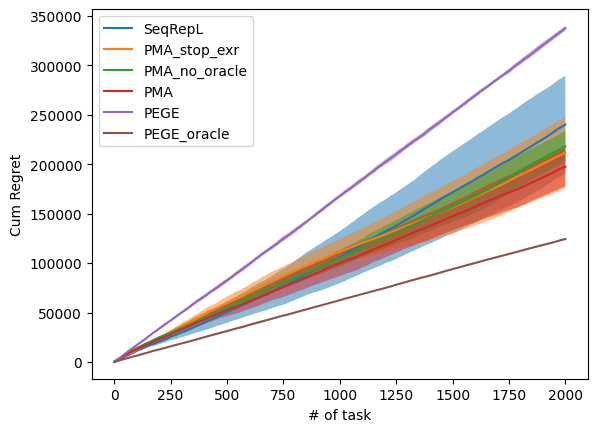

In [167]:
mean_PEGE2 = np.mean(best_PEGE2['regrets'], axis=0)
std_PEGE2 = np.std(best_PEGE2['regrets'], axis=0)
mean_PEGE_oracle2 = np.mean(best_PEGE_oracle2['regrets'], axis=0)
std_PEGE_oracle2 = np.std(best_PEGE_oracle2['regrets'], axis=0)
mean_PMA2 = np.mean(best_PMA2['regrets'], axis=0)
std_PMA2 = np.std(best_PMA2['regrets'], axis=0)
mean_PMA_stop_exr2 = np.mean(best_PMA_stop_exr2['regrets'], axis=0)
std_PMA_stop_exr2 = np.std(best_PMA_stop_exr2['regrets'], axis=0)
mean_PMA_no_oracle2 = np.mean(best_PMA_no_oracle2['regrets'], axis=0)
std_PMA_no_oracle2 = np.std(best_PMA_no_oracle2['regrets'], axis=0)
mean_SeqRepL2 = np.mean(best_SeqRepL2['regrets'], axis=0)
std_SeqRepL2 = np.std(best_SeqRepL2['regrets'], axis=0)
X = np.arange(1,n_task+1)
plt.plot(X, mean_SeqRepL2, '-', label='SeqRepL')
plt.fill_between(X, mean_SeqRepL2-std_SeqRepL2, mean_SeqRepL2+std_SeqRepL2, alpha=0.5)
plt.plot(X, mean_PMA_stop_exr2, '-', label='PMA_stop_exr')
plt.fill_between(X, mean_PMA_stop_exr2-std_PMA_stop_exr2, mean_PMA_stop_exr2+std_PMA_stop_exr2, alpha=0.5)
plt.plot(X, mean_PMA_no_oracle2, '-', label='PMA_no_oracle')
plt.fill_between(X, mean_PMA_no_oracle2-std_PMA_no_oracle2, mean_PMA_no_oracle2+std_PMA_no_oracle2, alpha=0.5)
plt.plot(X, mean_PMA2, '-', label='PMA')
plt.fill_between(X, mean_PMA2-std_PMA2, mean_PMA2+std_PMA2, alpha=0.5)
plt.plot(X, mean_PEGE2, '-', label='PEGE')
plt.fill_between(X, mean_PEGE2-std_PEGE2, mean_PEGE2+std_PEGE2, alpha=0.5)
plt.plot(X, mean_PEGE_oracle2, '-', label='PEGE_oracle')
plt.fill_between(X, mean_PEGE_oracle2-std_PEGE_oracle2, mean_PEGE_oracle2+std_PEGE_oracle2, alpha=0.5)
plt.xlabel('# of task')
plt.ylabel('Cum Regret')
plt.legend()
plt.show()
plt.close()

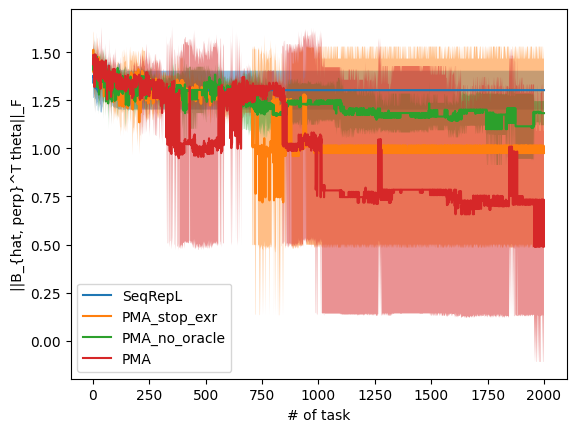

In [168]:
mean_PMA2 = np.mean(best_PMA2['B_hat_err'], axis=0)
std_PMA2 = np.std(best_PMA2['B_hat_err'], axis=0)
mean_SeqRepL2 = np.mean(best_SeqRepL2['B_hat_err'], axis=0)
std_SeqRepL2 = np.std(best_SeqRepL2['B_hat_err'], axis=0)
mean_PMA_stop_exr2 = np.mean(best_PMA_stop_exr2['B_hat_err'], axis=0)
std_PMA_stop_exr2 = np.std(best_PMA_stop_exr2['B_hat_err'], axis=0)
mean_PMA_no_oracle2 = np.mean(best_PMA_no_oracle2['B_hat_err'], axis=0)
std_PMA_no_oracle2 = np.std(best_PMA_no_oracle2['B_hat_err'], axis=0)

X = np.arange(1,n_task+1)
plt.plot(X, mean_SeqRepL2, '-', label='SeqRepL')
plt.fill_between(X, mean_SeqRepL2-std_SeqRepL2, mean_SeqRepL2+std_SeqRepL2, alpha=0.5)
plt.plot(X, mean_PMA_stop_exr2, '-', label='PMA_stop_exr')
plt.fill_between(X, mean_PMA_stop_exr2-std_PMA_stop_exr2, mean_PMA_stop_exr2+std_PMA_stop_exr2, alpha=0.5)
plt.plot(X, mean_PMA_no_oracle2, '-', label='PMA_no_oracle')
plt.fill_between(X, mean_PMA_no_oracle2-std_PMA_no_oracle2, mean_PMA_no_oracle2+std_PMA_no_oracle2, alpha=0.5)
plt.plot(X, mean_PMA2, '-', label='PMA')
plt.fill_between(X, mean_PMA2-std_PMA2, mean_PMA2+std_PMA2, alpha=0.5)
plt.xlabel('# of task')
plt.ylabel('||B_{hat, perp}^T theta||_F')
plt.legend()
plt.show()
plt.close()

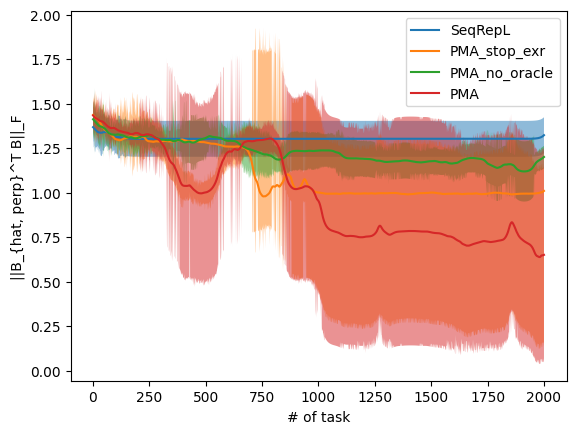

In [169]:
rbf = Rbf(X, mean_PMA_stop_exr2, function = 'multiquadric', smooth = 500)
y_PMA_stop_exr_rbf2 = rbf(X)
rbf = Rbf(X, mean_PMA_no_oracle2, function = 'multiquadric', smooth = 500)
y_PMA_no_oracle_rbf2 = rbf(X)
rbf = Rbf(X, mean_PMA2, function = 'multiquadric', smooth = 500)
y_PMA_rbf2 = rbf(X)
rbf = Rbf(X, mean_SeqRepL2, function = 'multiquadric', smooth = 500)
y_SeqRepL_rbf2 = rbf(X)

plt.plot(X, y_SeqRepL_rbf2, '-', label='SeqRepL')
plt.fill_between(X, y_SeqRepL_rbf2-std_SeqRepL2, y_SeqRepL_rbf2+std_SeqRepL2, alpha=0.5)
plt.plot(X, y_PMA_stop_exr_rbf2, '-', label='PMA_stop_exr')
plt.fill_between(X, y_PMA_rbf2-std_PMA_stop_exr2, y_PMA_rbf2+std_PMA_stop_exr2, alpha=0.5)
plt.plot(X, y_PMA_no_oracle_rbf2, '-', label='PMA_no_oracle')
plt.fill_between(X, y_PMA_no_oracle_rbf2-std_PMA_no_oracle2, y_PMA_no_oracle_rbf2+std_PMA_no_oracle2, alpha=0.5)
plt.plot(X, y_PMA_rbf2, '-', label='PMA')
plt.fill_between(X, y_PMA_rbf2-std_PMA2, y_PMA_rbf2+std_PMA2, alpha=0.5)
plt.xlabel('# of task')
plt.ylabel('||B_{hat, perp}^T B||_F')

plt.legend()
plt.show()

# Others

In [170]:
# def round(X, precision = .03):
#     return np.round(np.array(X)/precision)*precision
# round(mean_PMA)

In [171]:
# input_dict["name"] = "TS"
# input_dict["params_set"] = v_set
# if is_multi:
#     best_TS = eval_multi(input_dict)
# else:
#     best_TS = eval(input_dict)

# input_dict["name"] = "PEGE"
# input_dict["params_set"] = tau_1_PEGE_set
# if is_multi:
#     best_PEGE = eval_multi(input_dict)
# else:
#     best_PEGE = eval(input_dict)

# input_dict["name"] = "PHE"
# input_dict["params_set"] = alpha_PHE_set
# if is_multi:
#     best_PHE = eval_multi(input_dict)
# else:
#     best_PHE = eval(input_dict)

In [172]:
# input_dict["n_sim"] = 3

# input_dict["name"] = "UCB"
# input_dict["params_set"] = alpha_set
# best_UCB = eval(input_dict)

# input_dict["name"] = "TS"
# input_dict["params_set"] = v_set
# best_TS = eval(input_dict)

# mean_UCB = np.mean(best_UCB['regrets'], axis=0)
# std_UCB = np.std(best_UCB['regrets'], axis=0)
# mean_TS = np.mean(best_TS['regrets'], axis=0)
# std_TS = np.std(best_TS['regrets'], axis=0)
# X = np.arange(1,T+1)
# plt.plot(X, mean_TS, '-', label='TS')
# plt.fill_between(X, mean_TS-std_TS, mean_TS+std_TS, alpha=0.5)
# plt.plot(X, mean_UCB, '-', label='UCB')
# plt.fill_between(X, mean_UCB-std_UCB, mean_UCB+std_UCB, alpha=0.5)
# plt.xlabel('# of step')
# plt.ylabel('Cum Regret')
# plt.legend()
# plt.show()
# plt.close()